### Task 1-1. Text-guided image generation with Stable Diffusion
#### Import Stable Diffusion (SD) from Diffusers Library

In [1]:
import torch
from PIL import Image
from diffusers import StableDiffusionPipeline, DDIMScheduler

# Set CUDA device
device = torch.device('cuda:8' if torch.cuda.is_available() else 'cpu')

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
2023-07-17 16:12:12.131154: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Define utility functions

In [2]:
''' Fix the seed for for reproducibility '''
def seed_everything(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

''' Given the SD version, return its Huggingface model ID '''
def set_sd_model_id(sd_version):
    if sd_version == "v1-4":
        model_id = "CompVis/stable-diffusion-v1-4"
    elif sd_version == "v1-5":
        model_id = "runwayml/stable-diffusion-v1-5"
    elif sd_version == "v2-0":
        model_id = "stabilityai/stable-diffusion-2"
    elif sd_version == "v2-1":
        model_id = "stabilityai/stable-diffusion-2-1"
    else:
        raise ValueError("Invalid sd_version")
    return model_id

#### Select the SD version (Note: Tested on SD v1.5)

In [3]:
# TODO: Set SD version
sd_version = "v1-5"     # versions:"v1-4", "v1-5", "v2-0", "v2-1"

#### Load the SD model
* Set `$YOUR_TOKEN` as your own Huggingface access token. You can obtain the token from https://huggingface.co/settings/tokens.
* If loading Stable Diffusion is interrupted with an `HTTPSConnectionPool` error, run the code again then it will resume loading the model if `resume_download=True`.

In [8]:
# Set model ID
model_id = set_sd_model_id(sd_version)
print(f"[INFO] Model ID: {model_id}")

# TODO: Set Huggingface Token
hf_token = "$YOUR_TOKEN"

# Load DDIM scheduler
scheduler = DDIMScheduler.from_pretrained(model_id, subfolder="scheduler")

# Load Stable Diffusion pipeline
pipe = StableDiffusionPipeline.from_pretrained(
    model_id, 
    scheduler=scheduler, 
    torch_dtype=torch.float16,
    use_auth_token=hf_token,
    resume_download=True
)
pipe = pipe.to(device)
print("[INFO] Loaded Stable Diffusion pipeline!")

[INFO] Model ID: runwayml/stable-diffusion-v1-5


`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


[INFO] Loaded Stable Diffusion pipeline!


#### Generate an image with a text prompt

In [13]:
# Set seed
seed_everything(2023)

# TODO: Set a text prompt
prompt = "a photo of an astronaut riding a horse on mars"

# Generate an image with Stable Diffusion
image = pipe(prompt).images[0]

# Save the image
# image.save("task_1_1_output.png")

  0%|          | 0/50 [00:00<?, ?it/s]

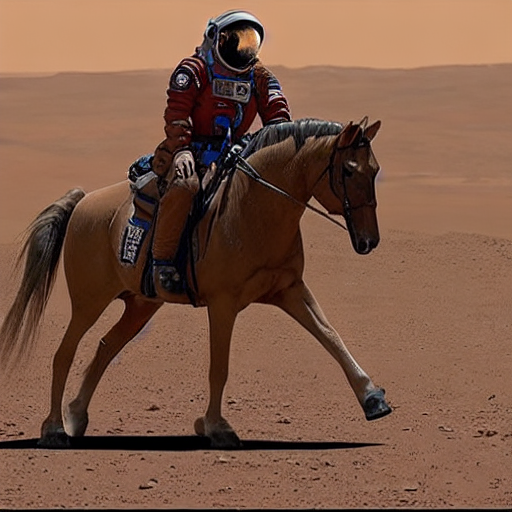

In [14]:
# Visualize the generated image
image